<a href="https://colab.research.google.com/github/anaisaoviedo-upb/Clustering-Retencion-Empleados/blob/main/Clustering_Empleados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering -  Empleados

1. Preparación de datos: variables numéricas se deben normalizar y variables categórcias se crean dummies
2. Aprendizaje del Modelo: Kmeans, método del codo/rodilla
3. Evaluación del Modelo: Inertia, silueta
4. Perfilamiento: Descripción de centroides



In [ ]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica



# 1. Preparación de Datos

* Previa limpieza de atípicos, nulos y altas correlaciones









In [ ]:
# Se cargan los datos
df = pd.read_excel("Empleados.xlsx",sheet_name=0) #Cargar datos en excel
df.head() #muestras los 5 primeros registros

,Sueldo,Casado,Carro,Hijos,Casa,Sindicato,Incapacidades,Antiguedad,Sexo
0,4100000,Sí,No,0,Alquiler,No,7,15,H
1,5600000,No,Sí,1,Alquiler,Sí,3,3,M
2,5200000,Sí,Sí,2,Prop,Sí,5,10,H
3,7100000,Sí,Sí,1,Alquiler,No,15,7,M
4,4200000,Sí,Sí,0,Prop,Sí,1,6,H


In [ ]:
#Eliminar una columna
#df= df.drop('Nombre', axis=1) # Eliminar una columna

In [ ]:
#Se revisan los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sueldo         270 non-null    int64 
 1   Casado         270 non-null    object
 2   Carro          270 non-null    object
 3   Hijos          270 non-null    int64 
 4   Casa           270 non-null    object
 5   Sindicato      270 non-null    object
 6   Incapacidades  270 non-null    int64 
 7   Antiguedad     270 non-null    int64 
 8   Sexo           270 non-null    object
dtypes: int64(4), object(5)
memory usage: 19.1+ KB


In [ ]:
#Corregir tipos de datos
df['Casado']=df['Casado'].astype('category')
df['Carro']=df['Carro'].astype('category')

#...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sueldo         270 non-null    int64   
 1   Casado         270 non-null    category
 2   Carro          270 non-null    category
 3   Hijos          270 non-null    int64   
 4   Casa           270 non-null    object  
 5   Sindicato      270 non-null    object  
 6   Incapacidades  270 non-null    int64   
 7   Antiguedad     270 non-null    int64   
 8   Sexo           270 non-null    object  
dtypes: category(2), int64(4), object(3)
memory usage: 15.7+ KB


In [ ]:
#Descripción estadística de variable numéricas
df.describe()

,Sueldo,Hijos,Incapacidades,Antiguedad
count,2.700000e+02,270.000000,270.000000,270.000000
mean,5.605185e+06,0.733333,5.266667,8.200000
std,1.347271e+06,0.999628,6.877797,5.265868
min,2.000000e+06,0.000000,0.000000,1.000000
25%,4.600000e+06,0.000000,1.000000,5.000000
50%,5.700000e+06,0.000000,3.000000,7.000000
75%,6.500000e+06,2.000000,7.000000,12.000000
max,9.200000e+06,3.000000,27.000000,20.000000


array([[<Axes: title={'center': 'Sueldo'}>,
        <Axes: title={'center': 'Hijos'}>],
       [<Axes: title={'center': 'Incapacidades'}>,
        <Axes: title={'center': 'Antiguedad'}>]], dtype=object)

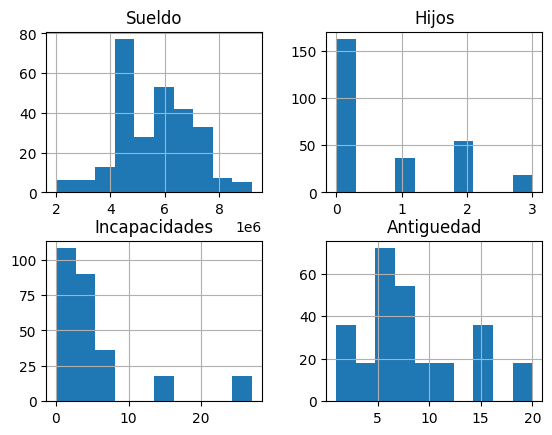

In [ ]:
#Histogramas de las variables numéricas
df.hist()

<Axes: >

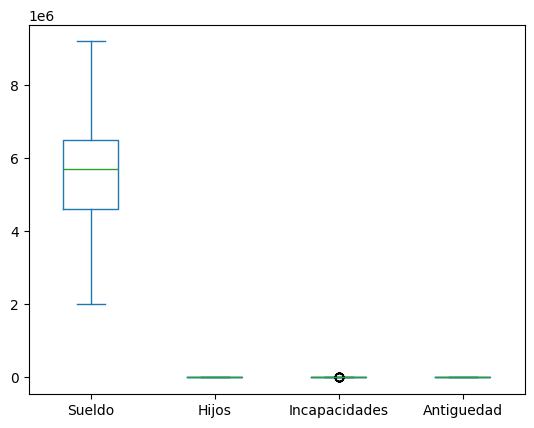

In [ ]:
#Gráfico box para variables numéricas
df.plot(kind='box')

<Axes: >

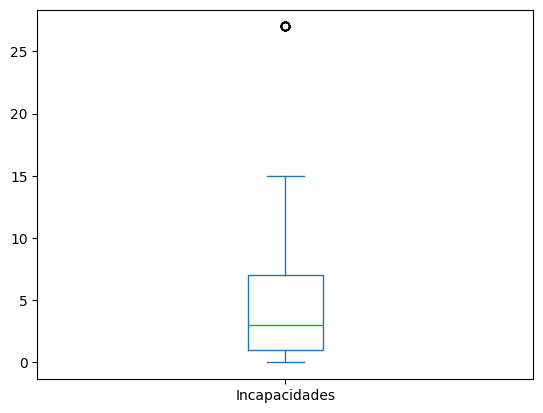

In [ ]:
#Gráfico box solo para la variable Incapacidades
df['Incapacidades'].plot(kind='box') #No es un error

<Axes: xlabel='Casado'>

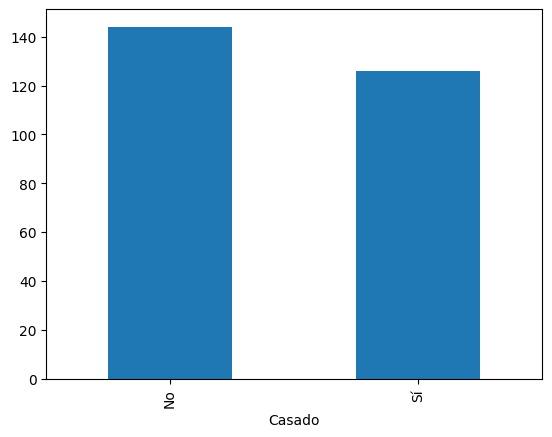

In [ ]:
#Conocemos las variables categóricas: value_counts()
df['Casado'].value_counts().plot(kind='bar')

<Axes: xlabel='Carro'>

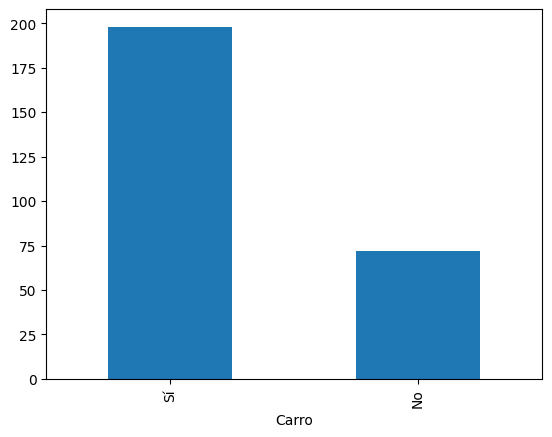

In [ ]:
df['Carro'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

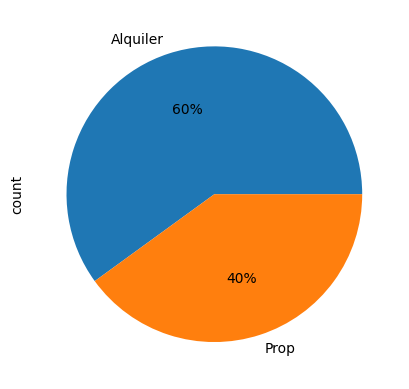

In [ ]:
df['Casa'].value_counts().plot(kind='pie',autopct='%.0f%%')


<Axes: xlabel='Sexo'>

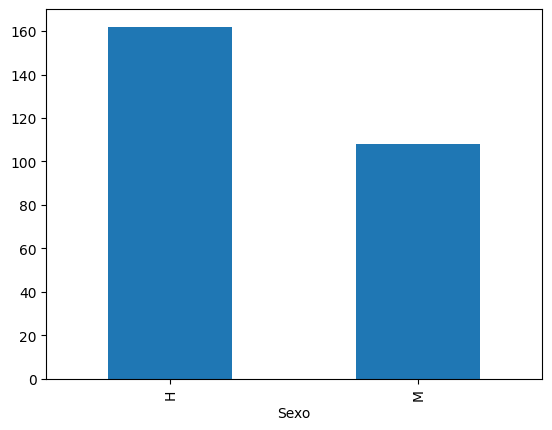

In [ ]:
df['Sexo'].value_counts().plot(kind='bar')

<Axes: xlabel='Sindicato'>

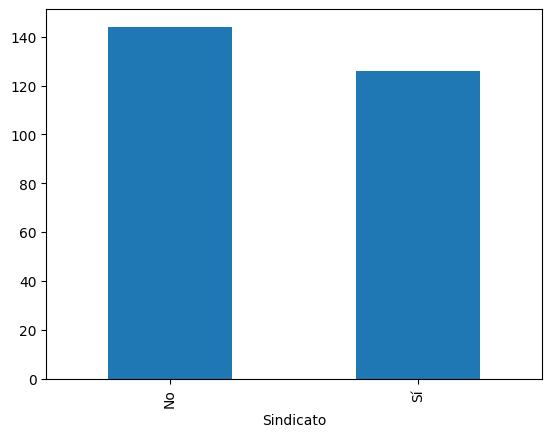

In [ ]:
df['Sindicato'].value_counts().plot(kind='bar')


In [ ]:
#No se hace balanceo porque no hay variable objetivo

In [ ]:
#Transformaciones: normalizar y crear dummies

#Copia de los datos
data=df.copy()


In [ ]:
#Normalizacion de variables numéricas
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
variables_a_normalizar=['Sueldo',	'Hijos',	'Incapacidades',	'Antiguedad']
min_max_scaler.fit(data[variables_a_normalizar]) #Ajuste de parámetro
data[variables_a_normalizar]= min_max_scaler.transform(data[variables_a_normalizar])
data.head()

,Sueldo,Casado,Carro,Hijos,Casa,Sindicato,Incapacidades,Antiguedad,Sexo
0,0.291667,Sí,No,0.000000,Alquiler,No,0.259259,0.736842,H
1,0.500000,No,Sí,0.333333,Alquiler,Sí,0.111111,0.105263,M
2,0.444444,Sí,Sí,0.666667,Prop,Sí,0.185185,0.473684,H
3,0.708333,Sí,Sí,0.333333,Alquiler,No,0.555556,0.315789,M
4,0.305556,Sí,Sí,0.000000,Prop,Sí,0.037037,0.263158,H


In [ ]:
# Se crean dummies para las variables categóricas
data = pd.get_dummies(data, columns=['Casado', 'Carro', 'Casa', 'Sexo','Sindicato'], drop_first=True, dtype=int)

#data = pd.get_dummies(data, columns=['Tipo'], drop_first=False,  dtype=int) #No borra dummy
data.head()

,Sueldo,Hijos,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Sindicato_Sí
0,0.291667,0.000000,0.259259,0.736842,1,0,0,0,0
1,0.500000,0.333333,0.111111,0.105263,0,1,0,1,1
2,0.444444,0.666667,0.185185,0.473684,1,1,1,0,1
3,0.708333,0.333333,0.555556,0.315789,1,1,0,1,0
4,0.305556,0.000000,0.037037,0.263158,1,1,1,0,1


# 2. Aprendizaje del Modelo
* Metodo del codo/rodilla
* Aplicar kmeans

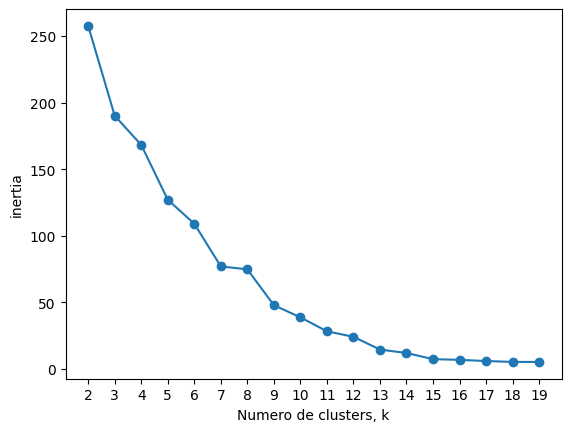

In [ ]:
#Método del codo para encontrar la mejor cantidad de clusters: inertia
from sklearn.cluster import KMeans

ks = range(2, 20) # crear valores del 2 al 20
inertias = []

for k in ks:
    # Crear  modelo
    model = KMeans(n_clusters=k,max_iter=300)
    model.fit(data)
    inertias.append(model.inertia_)

# Graficar cantidad de clusters vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Numero de clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

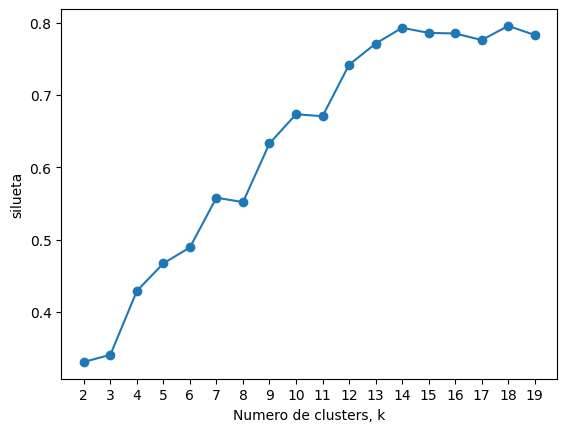

In [ ]:
#Método de la rodilla: silueta
from sklearn import metrics

ks = range(2, 20) # crear valores del 2 al 20
siluetas = []

for k in ks:
    # Crear  modelo
    model = KMeans(n_clusters=k,max_iter=300)
    model.fit(data)
    sil=metrics.silhouette_score(data, model.labels_)
    siluetas.append(sil)

# Graficar cantidad de clusters vs inertias
plt.plot(ks, siluetas, '-o')
plt.xlabel('Numero de clusters, k')
plt.ylabel('silueta')
plt.xticks(ks)
plt.show()

In [ ]:
#Creación de modelo de clustering con Kmeans
from sklearn.cluster import KMeans
k=7
model = KMeans(n_clusters=k, max_iter=300)
model.fit(data) #100% datos

KMeans()

# 3. Evaluación del Modelo


*   Inertia: valor pequeño esperado
*   Silueta: valor positivo esperado, idealmente mayor a 0.5



In [ ]:
#Evaluación
from sklearn import metrics

#Inertia: se require valor pequeño
print('Inercia o cohesión:', model.inertia_)

#Silueta: se requiere que sea positivo, ideal 0.5-1.0
sil=metrics.silhouette_score(data, model.labels_)
print('Silueta:',sil)

Inercia o cohesión: 64.24162143768993
Silueta: 0.5845471333361063


# 4. Perfilamiento

Descripción de centroides

In [ ]:
#Centroides almacenados dentro del modelo
model.cluster_centers_

array([[ 5.49768519e-01,  1.66666667e-01,  1.11111111e-01,
         4.47368421e-01,  0.00000000e+00,  1.00000000e+00,
        -1.66533454e-16,  1.00000000e+00,  1.00000000e+00],
       [ 4.67078189e-01,  7.77777778e-01,  1.35802469e-01,
         4.03508772e-01,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  2.77555756e-16,  5.55111512e-16],
       [ 5.97608025e-01,  8.32667268e-17,  5.37037037e-01,
         3.94736842e-01,  0.00000000e+00, -2.22044605e-16,
        -1.66533454e-16,  1.00000000e+00,  0.00000000e+00],
       [ 4.73508230e-01,  3.60822483e-16,  3.70370370e-02,
         2.45614035e-01,  5.55111512e-16,  6.66666667e-01,
         2.77555756e-16,  2.77555756e-16,  6.66666667e-01],
       [ 4.54089506e-01,  3.33333333e-01,  1.11111111e-01,
         3.68421053e-01,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.66533454e-16,  1.00000000e+00],
       [ 3.90432099e-01,  2.77555756e-17,  2.59259259e-01,
         7.36842105e-01,  1.00000000e+00,  3.330669

In [ ]:
#Centroides de los cluster se convierten  en un dataframe de pandas
centroides=pd.DataFrame(model.cluster_centers_, columns=data.columns.values)
centroides.round(1)

,Sueldo,Hijos,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Sindicato_Sí
0,0.5,0.2,0.1,0.4,0.0,1.0,-0.0,1.0,1.0
1,0.5,0.8,0.1,0.4,1.0,1.0,1.0,0.0,0.0
2,0.6,0.0,0.5,0.4,0.0,-0.0,-0.0,1.0,0.0
3,0.5,0.0,0.0,0.2,0.0,0.7,0.0,0.0,0.7
4,0.5,0.3,0.1,0.4,1.0,1.0,1.0,-0.0,1.0
5,0.4,0.0,0.3,0.7,1.0,0.0,-0.0,-0.0,0.0
6,0.6,0.3,0.6,0.3,1.0,1.0,-0.0,1.0,0.0
7,0.5,0.0,0.1,0.3,0.0,1.0,1.0,1.0,1.0


In [ ]:
# Se realiza una des-normalización centroides
centroides[variables_a_normalizar]=min_max_scaler.inverse_transform(centroides[variables_a_normalizar])
centroides.round(0)

,Sueldo,Hijos,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Sindicato_Sí
0,5958333.0,1.0,3.0,10.0,0.0,1.0,-0.0,1.0,1.0
1,5362963.0,2.0,4.0,9.0,1.0,1.0,1.0,0.0,0.0
2,6302778.0,0.0,14.0,8.0,0.0,-0.0,-0.0,1.0,0.0
3,5409259.0,0.0,1.0,6.0,0.0,1.0,0.0,0.0,1.0
4,5269444.0,1.0,3.0,8.0,1.0,1.0,1.0,-0.0,1.0
5,4811111.0,0.0,7.0,15.0,1.0,0.0,-0.0,-0.0,0.0
6,5961111.0,1.0,15.0,7.0,1.0,1.0,-0.0,1.0,0.0
7,5927778.0,0.0,2.0,6.0,0.0,1.0,1.0,1.0,1.0


# **4. PERFILAMIENTO**

**DESCRIPCIÓN DE PERFILES**

PERFIL 0: Salario de 4.800.000, no hijos, incapacidades 7 dias al año, 15 años de antiguedad, casados, no carro, no casa...

PERFIL 1:

PERFIL 2:

PERFIL 3:

PERFIL 4:

PERFIL 5:

PERFIL 6:

PERFIL 7:



In [ ]:
#En el dataframe original, se adiciona el cluster asignado a cada registro
df['cluster']=model.labels_
df.head()

,Sueldo,Casado,Carro,Hijos,Casa,Sindicato,Incapacidades,Antiguedad,Sexo,cluster
0,4100000,Sí,No,0,Alquiler,No,7,15,H,5
1,5600000,No,Sí,1,Alquiler,Sí,3,3,M,0
2,5200000,Sí,Sí,2,Prop,Sí,5,10,H,4
3,7100000,Sí,Sí,1,Alquiler,No,15,7,M,6
4,4200000,Sí,Sí,0,Prop,Sí,1,6,H,4


<Axes: ylabel='count'>

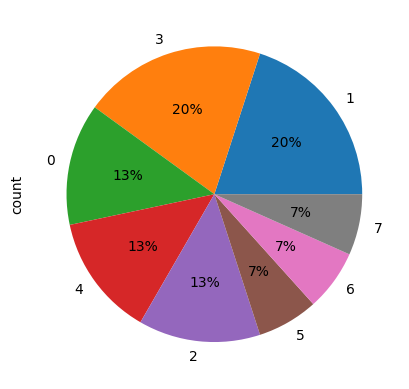

In [ ]:
#Cantidad de datos en cada cluster
df["cluster"].value_counts().plot(kind='pie',autopct='%.0f%%')

In [ ]:
#Almacenar resultados
df.to_excel('./resultados_Kmeans.xlsx')
centroides.to_excel('./centroides.xlsx')
